### Backtest Hyperfitting

In [1]:
import numpy as np
#import cupy  #Requires Cuda environment (and numpy). Also set CUPY_CACHE_DIR=/gpfs/gpfs0/deep/cupy, pip install cupy-cuda112
import pandas as pd
import matplotlib.pylab as plt
import itertools
from FinancialMachineLearning.metrics.metrics import getExpectedMaxSR, getDistMaxSR, getMeanStdError

In [12]:
nTrials = list(set(np.logspace(1, 6, 100).astype(int))) #only 100 iterations, in book - 1000
nTrials.sort()
sr0 = pd.Series({i:getExpectedMaxSR(i, meanSR = 0, stdSR = 1) for i in nTrials}, name = "E[max{SR}] (prior)") #prior
sr1 = getDistMaxSR(nSims = 100, nTrials = nTrials, meanSR = 0, stdSR = 1) #observed

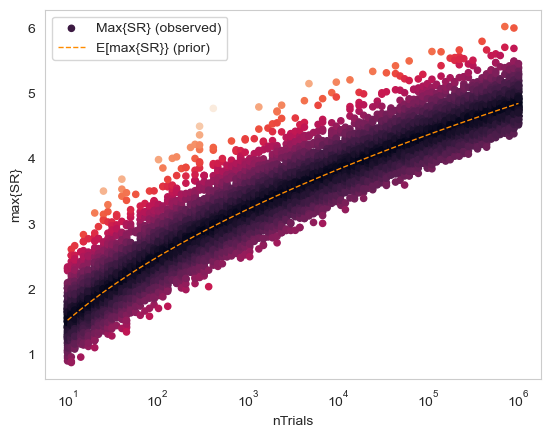

In [28]:
nnSR0 = list(itertools.chain.from_iterable(itertools.repeat(x, 100) for x in sr0.values))
deviationFromExpectation = abs(sr1['max{SR}'] - nnSR0)

ax = sr1.plot.scatter(
    x = 'nTrials', 
    y = 'max{SR}', 
    label = 'Max{SR} (observed)', 
    c = deviationFromExpectation
) #c: Array of values to use for marker colors.
ax.set_xscale('log')
ax.grid(False)
ax.plot(nTrials, sr0, linestyle = '--', linewidth=1, label = 'E[max{SR}} (prior)', color = 'darkorange')
plt.legend()
ax.figure.savefig('maxSR_across_uniform_strategies.png')

시행 횟수가 증가할수록 Sharpe Ratio는 필연적으로 증가한다. 이를 두고 백테스트 초과적합이라고 한다

In [32]:
nTrials = list(set(np.logspace(1, 6, 100).astype(int)))
nTrials.sort()
stats = getMeanStdError(nSims0 = 100, nSims1 = 100, nTrials = nTrials, stdSR = 1)

KeyboardInterrupt: 

In [ ]:
ax = stats.plot()
ax.set_xscale('log')
ax.figure.savefig('fig82.png')